In [ ]:
#This should perform every time when we run
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [ ]:
#This should perform every time when we run
!unzip kagglecatsanddogs_3367a.zip

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [4]:
input_path=[]
label=[]
dir='PetImages'
for class_path in os.listdir(dir):
  for path in os.listdir(dir+'/'+class_path):
    if class_path == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join('PetImages',class_path,path))
print(input_path[11456])

PetImages/Dog/7447.jpg


In [5]:
data=pd.DataFrame({"image_path":input_path,"category":label})

In [6]:
data.head()

,image_path,category
0,PetImages/Dog/10766.jpg,1
1,PetImages/Dog/8035.jpg,1
2,PetImages/Dog/8245.jpg,1
3,PetImages/Dog/955.jpg,1
4,PetImages/Dog/7310.jpg,1


Shuffle the data

In [7]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,image_path,category
0,PetImages/Dog/8801.jpg,1
1,PetImages/Cat/4049.jpg,0
2,PetImages/Dog/7253.jpg,1
3,PetImages/Cat/11268.jpg,0
4,PetImages/Dog/7038.jpg,1


In [38]:
for i in data['image_path']:
  if '.jpg' not in i:
    print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [44]:
#delete the files
data= data[data['image_path']!='PetImages/Dog/Thumbs.db']
print(len(data))
data= data[data['image_path']!='PetImages/Cat/Thumbs.db']
len(data)

25001


25000

In [55]:
import PIL
l=[]
for image in data['image_path']:
  try:
    img=PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Dog/11702.jpg', 'PetImages/Cat/666.jpg']

In [57]:
data= data[data['image_path']!='PetImages/Dog/11702.jpg']
data= data[data['image_path']!='PetImages/Cat/666.jpg']

## Visualize the data

In [ ]:
import random
plt.figure(figsize=(25,25))
temp=data[data['category']==0]['image_path']
start=random.randint(0,len(temp))
files=temp[start:start+25]
for index,x in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(x)
  img=np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

In [41]:
plt.figure(figsize=(10,10))
temp=data[data['category']==1]['image_path']
start=random.randint(0,len(temp))
files=temp[start:start+12]
for index,file in enumerate(files):
  plt.subplot(3,4,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

<Figure size 720x720 with 0 Axes>

#Checking for blanced dataset

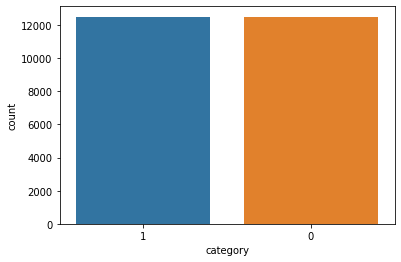

In [46]:
import seaborn as sns
sns.countplot(data['category'])

In [59]:
data['category']=data['category'].astype('str')

In [60]:
data.dtypes

image_path    object
category      object
dtype: object

#Split the dataset

In [90]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.2,random_state=43)
#split train_data into validattion and train data
train_df,val_data=train_test_split(train_data,test_size=0.2,random_state=43)
test_data.head()

,image_path,category
11151,PetImages/Cat/6537.jpg,0
8044,PetImages/Dog/209.jpg,1
2831,PetImages/Cat/1116.jpg,0
4608,PetImages/Cat/3055.jpg,0
3494,PetImages/Dog/5766.jpg,1


#Image_data_generator

In [62]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=57,
    shear_range=0.4,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_iterator = train_datagen.flow_from_dataframe(
        train_df,
        x_col='image_path',
        y_col='category',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
val_iterator = val_datagen.flow_from_dataframe(
        val_data,
        x_col='image_path',
        y_col='category',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 15998 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.


#Model_building

In [63]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model=Sequential([
                  #first cnn layer
                  Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(150,150,3)),
                  MaxPool2D((2,2)),
                  #second cnn layer
                  Conv2D(20, (3,3), activation='relu', kernel_initializer='he_uniform'),
                  MaxPool2D((2,2)),
                  #third cnn layer
                  Conv2D(15, (3,3), activation='relu', kernel_initializer='he_uniform'),
                  MaxPool2D((2,2)),
                  #flatten layer
                  Flatten(),
                  #First Dense layer
                  Dense(units=64, activation="relu", kernel_initializer='he_uniform'),
                  #Second Dense layer
                  Dense(units=35, activation="relu", kernel_initializer='he_uniform'),
                  #output layer..
                  Dense(units=1, activation='sigmoid')
])

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 20)        5780      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 20)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 15)        2715      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 15)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4335)             

In [67]:
cnn=model.fit_generator(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
500/500 [==============================] - 148s 297ms/step - loss: 0.4745 - accuracy: 0.7729 - val_loss: 0.5217 - val_accuracy: 0.7308
Epoch 2/10
500/500 [==============================] - 145s 290ms/step - loss: 0.4727 - accuracy: 0.7745 - val_loss: 0.4523 - val_accuracy: 0.7820
Epoch 3/10
500/500 [==============================] - 146s 292ms/step - loss: 0.4644 - accuracy: 0.7776 - val_loss: 0.4446 - val_accuracy: 0.7872
Epoch 4/10
500/500 [==============================] - 146s 292ms/step - loss: 0.4637 - accuracy: 0.7772 - val_loss: 0.4941 - val_accuracy: 0.7495
Epoch 5/10
500/500 [==============================] - 147s 294ms/step - loss: 0.4590 - accuracy: 0.7828 - val_loss: 0.4492 - val_accuracy: 0.7847
Epoch 6/10
500/500 [==============================] - 148s 295ms/step - loss: 0.4528 - accuracy: 0.7887 - val_loss: 0.4311 - val_accuracy: 0.8025
Epoch 7/10
500/500 [==============================] - 148s 296ms/step - loss: 0.4477 - accuracy: 0.7857 - val_loss: 0.4297 -